# Task 2: To Explore Supervised Machine Learning

# Submission  by:

# Intern: ANAY JOSHI

### Aim:  To predict the % of marks that a student is expected to score based upon the no. of hrs they studied.


### Concepts Invloved:  Simple Linear Regression as it involves just two variables.


#### Data can be found at http://bit.ly/w-data

#### Problem Statement : What will be predicted score if a student study for 9.25 hrs in a day?

# STEP -1 : Importing Essential Libraries

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

In [2]:
# Inserting data for performing operations

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Student data is importes successfully")
student_data

Student data is importes successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


After importing data, lets clean the data by checking if their is any null or irrelevent data.

In [3]:
# Using isnull() function for checking

student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Now, since there are no null values and so data cleaning is not required.

In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# STEP -2: Starting on with Visualizing Data

Let's start with data plotting and visualization for getting a brief and better understanding 

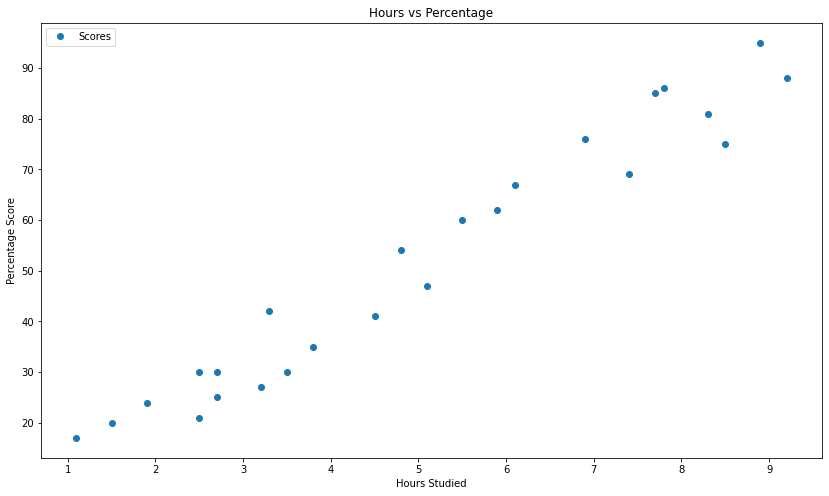

In [6]:
# Plotting the distribution of scores# Plotting the distribution of scores

student_data.plot(x='Hours', y='Scores', style='o',figsize=(14,8))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Text(0, 0.5, 'Scores Obtained')

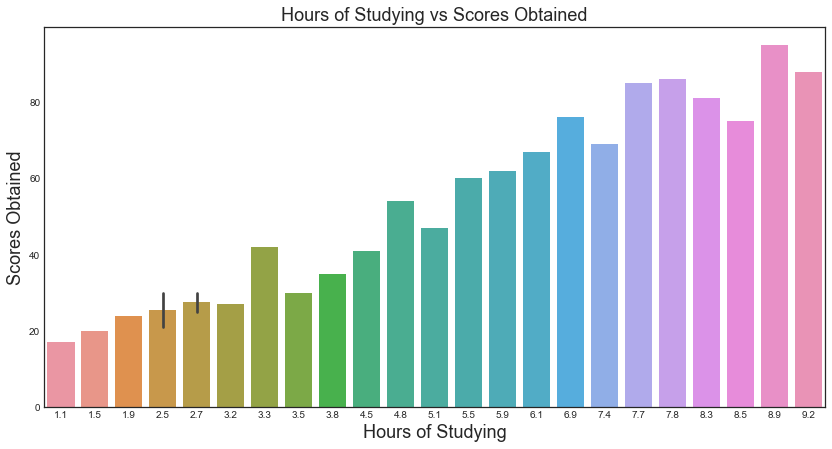

In [7]:
## Plotting using seaborn and matplotlib

plt.style.use('seaborn-white')
plt.figure(figsize=(14,7))
sns.barplot(x='Hours', y='Scores',data=student_data)
plt.title('Hours of Studying vs Scores Obtained',size=18)
plt.xlabel('Hours of Studying',size=18)
plt.ylabel('Scores Obtained',size=18)


# STEP -3: The Linear Regression Model

After some visualizations , now we'll prepare the data and split it for test data

Text(0, 0.5, 'Percentage')

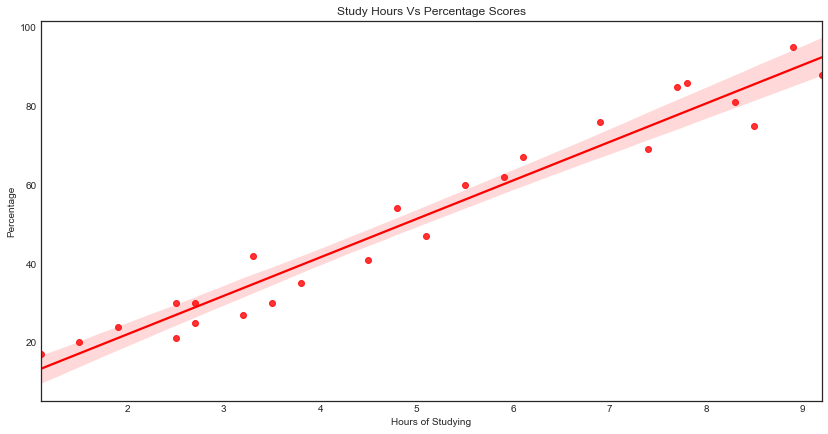

In [8]:
## Now we'll plot regressor for determining the relationship between feature and target

plt.figure(figsize=(14,7))
sns.regplot(x=student_data['Hours'],y=student_data['Scores'],data=student_data,color='red')
plt.title('Study Hours Vs Percentage Scores')
plt.xlabel('Hours of Studying')
plt.ylabel('Percentage')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing our  data**

In this step we will define and divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
x = student_data.iloc[:, :-1].values  #Attributes
y = student_data.iloc[:, 1].values  #labels

Now that we have our attributes and labels, the next step is to split this data into training and test sets.

We'll use Scikit-Learn's built-in train_test_split() method to split this data into training and test sets.

In [10]:
# Using Sklearn's bulit in train_test_split methos:

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80 , test_size=0.2, random_state=0) 

##### After splitting the dataset , now we have the training and testing sets and so we start training the model.

# Step -4: Training the Algorithm

Just for having some extra hands on, I will first try to make my own linear regression model from scratch and then, I'll try to use sklearn function for comparing both models.

#### Starting with the linear regression from scratch

In [11]:
LR = LinearRegression()  # LR stands for LinearRegressor
LR.fit(x_train,y_train)
YP = LR.predict(x_train) # YP stands for Y_prediction

In [12]:
reg = LinearRegression() # Here reg stands for regressor
reg.fit(x_train,y_train)
print("We have completed the process of training.")

We have completed the process of training.



##### Now, once we have fitted the data to the model, we'll try to plot the best fit line



Finding the coefficient of the data.


In [13]:
print(reg.coef_)

[9.91065648]


Finding the intercept of the data.


In [14]:
print(reg.intercept_)

2.018160041434683


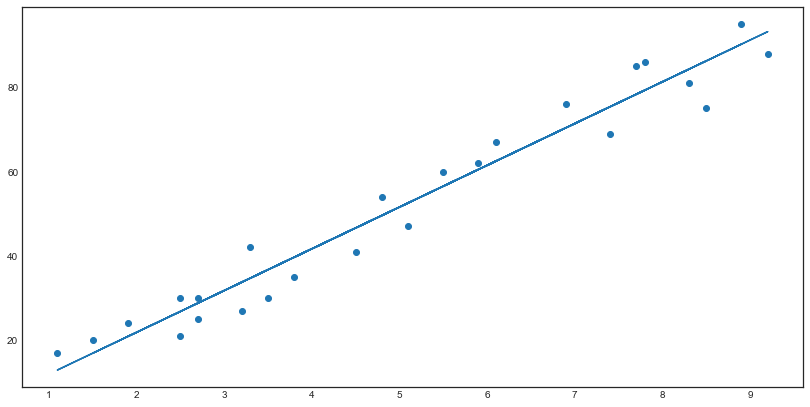

In [15]:
#Plotting the regression line

line = reg.coef_*x+reg.intercept_

#Now, we'll plot for the test data

plt.figure(figsize=(14,7))
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

# Step -5: Check the accuracy scores of training and testing sets


In [16]:
print('Training score: ',reg.score(x_train, y_train))
print('Testing score: ',reg.score(x_test, y_test))

Training score:  0.9515510725211552
Testing score:  0.9454906892105356


#### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
print(x_test) #Testing data - in hours
PY = reg.predict(x_test)  # PY fro y prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual Vs Predicted

df = pd.DataFrame({'Actual':y_test, 'Predicted': PY})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# Now, Lets predict the score for 9.25 hrs

print('Percentage of student who studied for 9.25 hours is = ',reg.predict([[9.25]]))

Percentage of student who studied for 9.25 hours is =  [93.69173249]


# Step -6: Evaluation of the model using Metrics


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, PY)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, PY)) ) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, PY)) 
print('R-2:', metrics.r2_score(y_test, PY)) 

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665
Mean Squared Error: 21.5987693072174
R-2: 0.9454906892105356
